In [56]:
#Importation des libreries
import numpy as np
import matplotlib.pyplot as plt

In [55]:
#Génération d'un signal synthétique
t=np.linspace(0, 1 , 1000)
f1=20
f2=15
f3=50
A=2
data=A*np.sin(2*np.pi*f1*t)+2*t+1/1+t +np.cos(2*np.pi*f2*t)*np.sin(-2*np.pi*f3*t)

Text(0.5, 1.0, 'Signal complexe')

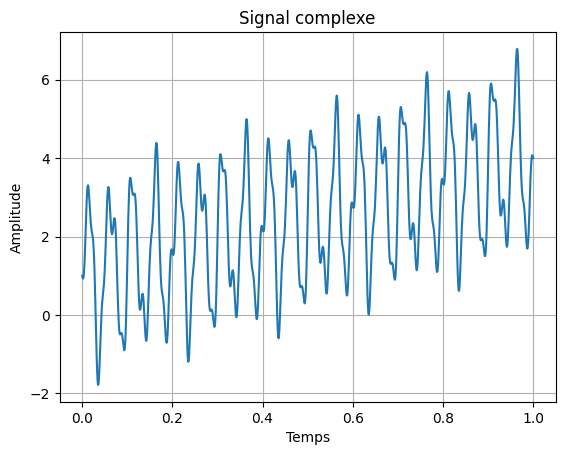

In [36]:
#Affichage du signal
plt.figure()
plt.plot(t, data)
plt.grid(True)
plt.xlabel('Temps')
plt.ylabel('Amplitude')
plt.title('Signal complexe')

In [37]:
#Génération du bruit blanc
b=np.random.normal(0 , 0.5 , 1000)

In [38]:
#Ajout du bruit au signal
d_b=data+b

Text(0.5, 1.0, 'Signal bruité')

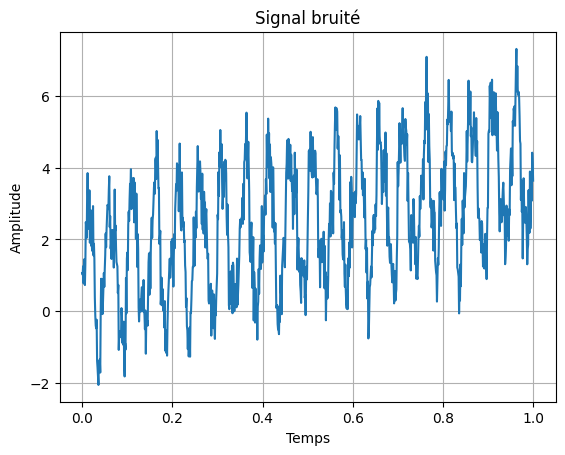

In [39]:
#Affichage du signal bruité
plt.figure()
plt.plot(t, d_b)
plt.grid(True)
plt.xlabel('Temps')
plt.ylabel('Amplitude')
plt.title('Signal bruité')

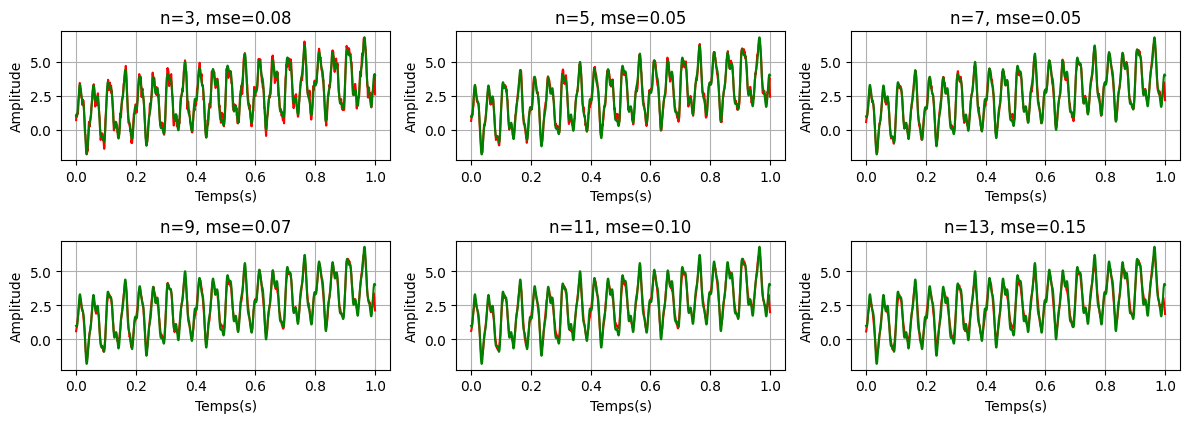

In [60]:
#Filtrage du signal en utilsant le filtre moyen gliisant
def M(n):
  return np.ones(n)/n
N=[3 , 5 , 7, 9 , 11, 13]
plt.figure(figsize=(12, 6))
MSE=[]
for i, n in enumerate(N):
  s_fm=np.convolve(d_b, M(n), mode='same')
  mse=np.sum((data-s_fm)**2)/len(data)
  MSE.append(mse)
  plt.subplot(3 , 3 , i+1)
  plt.plot(t ,  s_fm, color='r', label='Signal filtré')
  plt.plot(t , data, color='g', label='Signal original')
  plt.xlabel('Temps(s)')
  plt.ylabel('Amplitude')
  plt.title(f"n={n}, mse={mse:.2f}")
  plt.grid(True)
plt.tight_layout()

In [58]:
#Implémentation du filtre gaussien
def gaussian(size, sigma):
  x=np.linspace(-size//2, size//2, size)
  kernel=np.exp(-x**2/(2*sigma**2))
  kernel=kernel/np.sum(kernel)
  return kernel

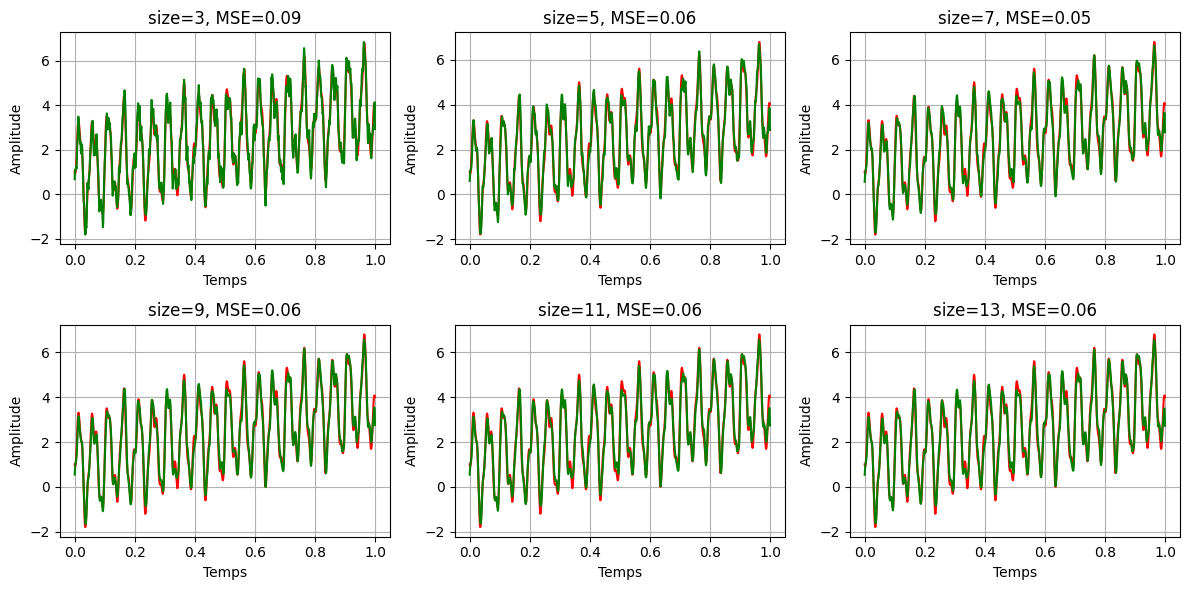

In [61]:
#Filtrage du signal bruité par le filtre gaussien glissant
size=[3 , 5 , 7 , 9 , 11 , 13]
MSE_g=[]
plt.figure(figsize=(12, 6))
for i, s in enumerate(size):
  s_f=np.convolve(d_b, gaussian(s, sigma=2), mode='same')
  mse=np.sum((data-s_f)**2)/len(data)
  MSE_g.append(mse)
  plt.subplot(2 , 3 , i+1)
  plt.plot(t , data, color='r', label='signal original')
  plt.plot(t, s_f, color='g', label='signal filtré')
  plt.xlabel('Temps')
  plt.ylabel('Amplitude')
  plt.title(f"size={s}, MSE={mse:.2f}")
  plt.grid(True)
plt.tight_layout()


**Reconstitution du signal original à partir du signal filtré**

In [63]:
#Filtre moyen
S_f=np.convolve(d_b, M(7), mode='same')

In [64]:
#Application de la transformé de Fourier
freq=np.fft.fftfreq(len(data), d=t[1]-t[0])
FFT=np.fft.fft(S_f)

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'spectre du signal')

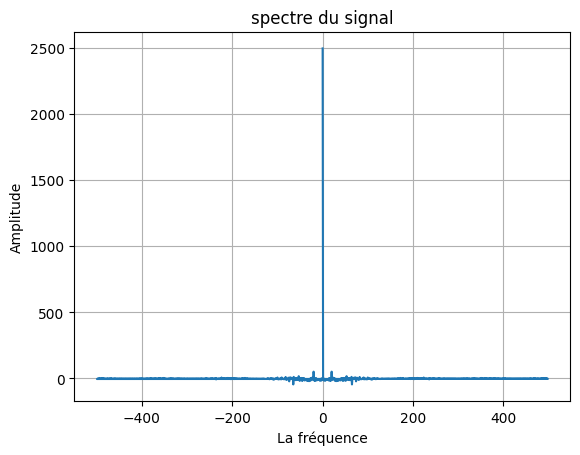

In [65]:
#Affichage du spectre
plt.figure()
plt.plot(freq, FFT)
plt.grid(True)
plt.xlabel('La fréquence')
plt.ylabel('Amplitude')
plt.title('spectre du signal')

In [66]:
#Recontitution
s_reconstruit=np.fft.ifft(FFT).real
MSE=np.sum((data-s_reconstruit)**2)/len(data)

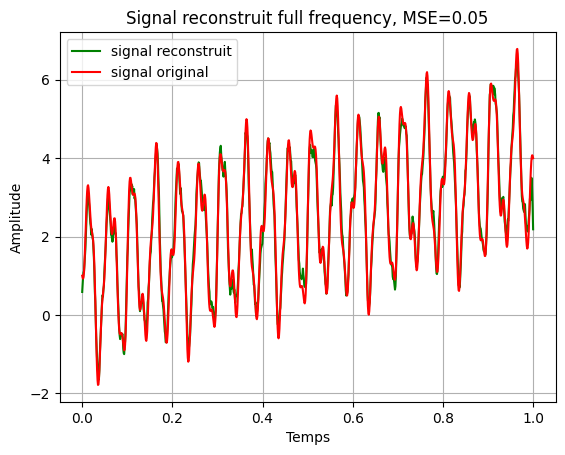

In [67]:
#Affichage du signal
plt.plot(t, s_reconstruit, color='g', label='signal reconstruit')
plt.plot(t, data, color='r', label='signal original')
plt.grid(True)
plt.xlabel('Temps')
plt.ylabel('Amplitude')
plt.title(f"Signal reconstruit full frequency, MSE={MSE:.2f}")
plt.legend()

In [77]:
#Reconstitution du signal BF
fb=15
fh=30
FFT_filtre=FFT.copy()
FFT_filtre[(np.abs(freq)< fb) | (np.abs(freq) >fh) ]=0
s_rec=np.fft.ifft(FFT_filtre).real

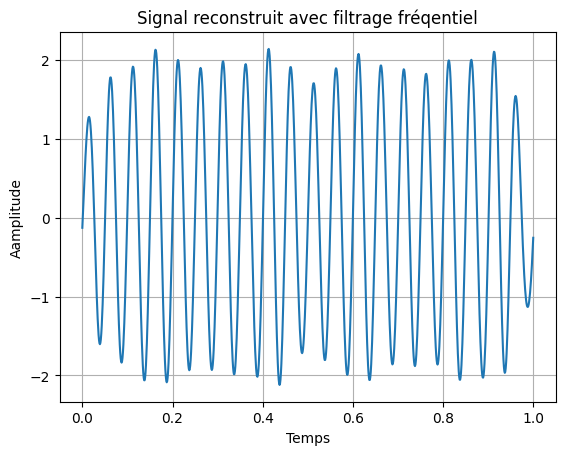

In [79]:
#Affichage du signal filtré
plt.figure()
plt.plot(t, s_rec)
plt.xlabel('Temps')
plt.ylabel('Aamplitude')
plt.title('Signal reconstruit avec filtrage fréqentiel')
plt.grid(True)